# Задача 1
Так как специалисту по машинному обучению часто приходится сталкиваться с различными API и их документацией необходимо уметь с этим работать. В рамках задачи нужно используя документацию https://yandex.ru/dev/direct/ получить токен песочницы написать на Python код собирающий данные по рекламным кампаниям Яндекс директ.

Как результат ожидается код для получения данных по кампаниям.

Банк крупный рекламодатель в залоговом кредитовании, подумайте, какие показатели нам были бы интересны и как можно использовать данное API для улучшения показателей банка?

In [4]:
import bs4
import requests, json
from requests.exceptions import ConnectionError
from time import sleep

In [13]:
CampaignsURL = 'https://api-sandbox.direct.yandex.com/json/v5/campaigns'
token = 'y0_AgAAAABjCnhZAAqjVAAAAADu3DcWELYo8zlCRdOPP3oE_J6gMwH41BQ'

headers = {
    "Authorization": "Bearer " + token,
    "Accept-Language": "ru",
}

body = {
    "method": "get",
    "params": {
        "SelectionCriteria": {},
        "FieldNames": ["BlockedIps", "Type"],
        "TextCampaignFieldNames": ["CounterIds", "RelevantKeywords", "Settings", "BiddingStrategy", "PriorityGoals"],
        "TextCampaignSearchStrategyPlacementTypesFieldNames": ["SearchResults", "ProductGallery"],
        "MobileAppCampaignFieldNames": ["Settings", "BiddingStrategy"],
        "DynamicTextCampaignFieldNames": ["CounterIds", "Settings", "PlacementTypes", "BiddingStrategy", "PriorityGoals"],
        "CpmBannerCampaignFieldNames": ["CounterIds", "FrequencyCap", "VideoTarget", "Settings", "BiddingStrategy"],
        "SmartCampaignFieldNames": ["CounterId", "Settings", "BiddingStrategy", "PriorityGoals"],

    }
}

jsonBody = json.dumps(body, ensure_ascii=False).encode('utf8')

try:
    result = requests.post(CampaignsURL, jsonBody, headers=headers)
    if result.status_code == 200:
        data = result.json()
        # Здесь можно обработать и вывести полученные данные
        print(json.dumps(data, indent=4))
    else:
        print("Произошла ошибка при выполнении запроса. Код ошибки:", result.status_code)

except ConnectionError:
    print("Произошла ошибка соединения с сервером API Директа.")
except Exception as e:
    print("Произошла непредвиденная ошибка:", str(e))

{
    "result": {
        "Campaigns": [
            {
                "Type": "TEXT_CAMPAIGN",
                "BlockedIps": null,
                "TextCampaign": {
                    "BiddingStrategy": {
                        "Search": {
                            "BiddingStrategyType": "HIGHEST_POSITION",
                            "PlacementTypes": {
                                "SearchResults": "YES",
                                "ProductGallery": "YES"
                            }
                        },
                        "Network": {
                            "BiddingStrategyType": "MAXIMUM_COVERAGE"
                        }
                    },
                    "Settings": [
                        {
                            "Option": "ADD_METRICA_TAG",
                            "Value": "NO"
                        },
                        {
                            "Option": "ADD_OPENSTAT_TAG",
                            "Value": "NO"
 

Ячейка Markdown в которой можно написать свои мысли по использованию API, чтобы продавать кредитов больше или тратить для этого на рекламу меньше:

С помощью данного API я получаю данные сразу по всем компаниям, и в ответе мне предоставляется необходимая мертрика. Рассмотрим какая:

1) Заблокированные компанией IP адреса

2)Тип компании (текстово-графическая)

3)Список ключевых слов

4) Стратегия рекламы

5)Способы показа мест (SearchResult или ProductGallery)

6)Стратегия ставок сети(Максимальное покрытие)

7)Разные опции, такие как добавление метки Я.Метрики, точное соответствие фраз, дневной бюджет, мониторинг сайта и т.д.

8)Приоритетные цели компании

9)установленные идентификаторы счетчика

10)Процент бюджета, выделенного для релевантных ключевых слов и  идентификатор цели оптимизации, который в данном случае равен 0.

Эти параметры включают в себя информацию о стратегии ставок, настройках кампании, наличии ключевых слов и других деталях, которые могут быть использованы для управления и улучшения эффективности текстово-графических рекламных кампаний в Яндекс.Директ.

## Задача 2
Базовое знание XML полезно для работы, так как в данном формате происходит обмен информацией между внешними источниками и системой принятия решений (СПР) банка. В рамках задачи необходимо написать код, получающий информацию о каталоге CD дисков с адреса https://www.w3schools.com/xml/cd_catalog.xml .

Данная задача должна показать ваши навыки по работе с XML форматом, поэтому уход в pandas не приветствуется, так как в реальной рабочей задаче будут технические ограничения по работе с pandas.

Напишите код, который:

1) Считает стоимость всех дисков в каталоге.

2) Какой год для дисков в каталоге является последним (самым современным)

3) Компания «Polydor» сменила своё название на «Poly», измените название этой компании у всех CD на актуальное в XML каталоге и сохраните новый XML файл

In [391]:
import requests

url = 'https://www.w3schools.com/xml/cd_catalog.xml'
response = requests.get(url)

import xml.etree.ElementTree as ET

root = ET.fromstring(response.text)
disks = root.findall('CD')
total_sum = 0
for cd in disks:
  price = float(cd.find('PRICE').text)
  total_sum+=price
total_sum = round(total_sum,2)
print('стоимость всех дисков в каталоге')
print(total_sum)
print()
max = 0
for cd in disks:
  year = int(cd.find('YEAR').text)
  if year>max:
    max = year
print('Какой год для дисков в каталоге является последним?')
print(max)
print()
print()
print()
print('Адреса дисков, которые сменили название компании')
for cd in disks:
  company = cd.find('COMPANY')
  if(company.text == 'Polydor'):
    company.text = 'Poly'
    print(cd)
print()
print()
print()
print('Финальная структура XML')
print(ET.dump(root))
output = "output.xml"
tree = ET.ElementTree(root)
tree.write(output,xml_declaration=True, encoding="utf-8")

стоимость всех дисков в каталоге
237.0

Какой год для дисков в каталоге является последним?
1999



Адреса дисков, которые сменили название компании
<Element 'CD' at 0x7f4a73684e50>
<Element 'CD' at 0x7f4a736864d0>
<Element 'CD' at 0x7f4a73685990>



Финальная структура XML
<CATALOG>
  <CD>
    <TITLE>Empire Burlesque</TITLE>
    <ARTIST>Bob Dylan</ARTIST>
    <COUNTRY>USA</COUNTRY>
    <COMPANY>Columbia</COMPANY>
    <PRICE>10.90</PRICE>
    <YEAR>1985</YEAR>
  </CD>
  <CD>
    <TITLE>Hide your heart</TITLE>
    <ARTIST>Bonnie Tyler</ARTIST>
    <COUNTRY>UK</COUNTRY>
    <COMPANY>CBS Records</COMPANY>
    <PRICE>9.90</PRICE>
    <YEAR>1988</YEAR>
  </CD>
  <CD>
    <TITLE>Greatest Hits</TITLE>
    <ARTIST>Dolly Parton</ARTIST>
    <COUNTRY>USA</COUNTRY>
    <COMPANY>RCA</COMPANY>
    <PRICE>9.90</PRICE>
    <YEAR>1982</YEAR>
  </CD>
  <CD>
    <TITLE>Still got the blues</TITLE>
    <ARTIST>Gary Moore</ARTIST>
    <COUNTRY>UK</COUNTRY>
    <COMPANY>Virgin records</COMPANY>
    <PRICE>1

## Задача 3


В качестве OLAP БД используется clickhouse, поэтому знание базового SQL синтаксиса является важным для выборок данных.

Базовой библиотекой для clickhouse является clickhouse-connect, поэтому предполагается использование данного коннектора

In [ ]:
pip install clickhouse_connect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.8/966.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.9 MB/s eta 0:00:00


In [ ]:
import clickhouse_connect
from clickhouse_connect.driver import Client as ClickHouseClient
import pandas as pd

client:ClickHouseClient = clickhouse_connect.get_client(host='play.clickhouse.com',
                                           username='play',
                                           password='clickhouse',
                                           database='default',
                                           secure=True,
                                           port=443)

# тестовые данные playground clickhouse совпадают не полностью, но являются данными похожими на hits метрики https://yandex.ru/dev/metrika/doc/api2/logs/fields/hits.html
client.query_df('DESCRIBE TABLE default.hits')

,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,WatchID,UInt64,,,,,
1,JavaEnable,UInt8,,,,,
2,Title,String,,,,,
3,GoodEvent,Int16,,,,,
4,EventTime,DateTime,,,,,
...,...,...,...,...,...,...,...
100,FromTag,String,,,,,
101,HasGCLID,UInt8,,,,,
102,RefererHash,UInt64,,,,,
103,URLHash,UInt64,,,,,


Мы подразумеваем, что WatchID уникален, так ли это?

In [ ]:
sql = '''
SELECT COUNT(T) from (SELECT DISTINCT WatchID as T
FROM default.hits)
'''
num = client.query_df(sql)
type(num)
num.columns
if(num.loc[0]['count(T)']< 100000000):
  print('WatchId не уникален')
else:
  print('Да, уникален')
num.loc[0]['count(T)']

WatchId не уникален


99997493

Сколько просмотров в среднем делает каждый юзер?

In [ ]:
sql  = '''
SELECT AVG(ViewsPerUser) AS AvgViewsPerUser
FROM
(SELECT COUNT(*) AS ViewsPerUser FROM default.hits GROUP BY UserID)
'''
client.query_df(sql)

,AvgViewsPerUser
0,5.671836


Сильно ли отличается количество средних просмотров по счётчикам?

В среднем в каждом счетчике

In [ ]:
sql = '''
SELECT CounterID, AVG(ViewsPerUser) AS AvgViewsPerCounter FROM
(SELECT  CounterID, COUNT(*) AS ViewsPerUser FROM default.hits GROUP BY CounterID, UserID)
GROUP BY CounterID
'''
client.query_df(sql)

,CounterID,AvgViewsPerCounter
0,130381,2.473002
1,170852,4.444444
2,160064,2.500000
3,201829,2.000000
4,41697,10.462687
...,...,...
1009,147484,1.054545
1010,237174,5.500000
1011,222205,7.804124
1012,213653,6.723404


In [ ]:
sql = '''
SELECT AVG(AvgViewsPerCounter) AS OverallAvgViews
FROM
    (SELECT CounterID, AVG(ViewsPerUser) AS AvgViewsPerCounter FROM
    (SELECT CounterID, UserID, COUNT(*) AS ViewsPerUser FROM default.hits GROUP BY CounterID, UserID)
    GROUP BY CounterID)
'''
client.query_df(sql)

,OverallAvgViews
0,3.17051


## Задача 4
Часть хитов помечены как DontCountHits в таблице default.hits, от каких показателей это зависит? Меняется ли данный показатель во времени?

Можно пользоваться моделями, корреляцией и другими инструментами, которые могут помочь в ответе на данный вопрос


In [ ]:
sql = '''
SELECT * FROM default.hits

'''
df = client.query_df(sql)

In [ ]:
df.head(5)

,WatchID,JavaEnable,Title,GoodEvent,EventTime,EventDate,CounterID,ClientIP,RegionID,UserID,...,UTMSource,UTMMedium,UTMCampaign,UTMContent,UTMTerm,FromTag,HasGCLID,RefererHash,URLHash,CLID
0,8185006245278510065,0,"Новостровск, ул. — на Яндекс.Погода рынок втор...",1,2013-07-15 15:02:34,2013-07-15,105857,1853441584,99,11440535657102496665,...,,,,,,,0,15715244355707756021,10711430570042140632,0
1,5111743697155524353,0,,1,2013-07-15 15:02:59,2013-07-15,105857,1853441584,99,11440535657102496665,...,,,,,,,0,18150585289071012696,10711430570042140632,0
2,8670650091651664641,0,"Новостровск, ул. — на Яндекс.Погода рынок втор...",1,2013-07-15 16:17:00,2013-07-15,105857,1853441584,99,11440535657102496665,...,,,,,,,0,15715244355707756021,10711430570042140632,0
3,5865759950110671120,0,,1,2013-07-15 16:17:13,2013-07-15,105857,1853441584,99,11440535657102496665,...,,,,,,,0,18150585289071012696,10711430570042140632,0
4,5933446346858771927,1,"Новостровск, Уфа, страница 3 сервис онлайн зап...",1,2013-07-15 06:18:30,2013-07-15,105857,3316306901,229,1149542006242512713,...,,,,,,,0,1790456984915188711,15060439506834663374,0


In [ ]:
column_names = df.columns.to_list()
print(column_names)

['WatchID', 'JavaEnable', 'Title', 'GoodEvent', 'EventTime', 'EventDate', 'CounterID', 'ClientIP', 'RegionID', 'UserID', 'CounterClass', 'OS', 'UserAgent', 'URL', 'Referer', 'Refresh', 'RefererCategoryID', 'RefererRegionID', 'URLCategoryID', 'URLRegionID', 'ResolutionWidth', 'ResolutionHeight', 'ResolutionDepth', 'FlashMajor', 'FlashMinor', 'FlashMinor2', 'NetMajor', 'NetMinor', 'UserAgentMajor', 'UserAgentMinor', 'CookieEnable', 'JavascriptEnable', 'IsMobile', 'MobilePhone', 'MobilePhoneModel', 'Params', 'IPNetworkID', 'TraficSourceID', 'SearchEngineID', 'SearchPhrase', 'AdvEngineID', 'IsArtifical', 'WindowClientWidth', 'WindowClientHeight', 'ClientTimeZone', 'ClientEventTime', 'SilverlightVersion1', 'SilverlightVersion2', 'SilverlightVersion3', 'SilverlightVersion4', 'PageCharset', 'CodeVersion', 'IsLink', 'IsDownload', 'IsNotBounce', 'FUniqID', 'OriginalURL', 'HID', 'IsOldCounter', 'IsEvent', 'IsParameter', 'DontCountHits', 'WithHash', 'HitColor', 'LocalEventTime', 'Age', 'Sex', 'In

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as pp

In [ ]:
df['DontCountHits']

0       0
1       1
2       0
3       1
4       0
       ..
8187    0
8188    0
8189    1
8190    0
8191    1
Name: DontCountHits, Length: 8192, dtype: uint8

0.2652587890625

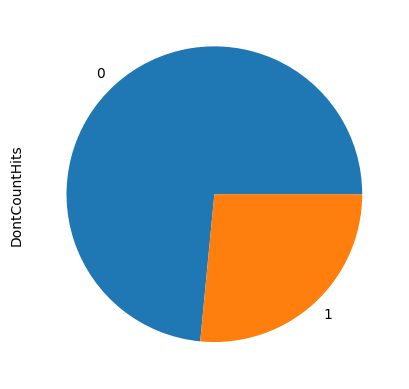

In [ ]:
df['DontCountHits'].value_counts().plot(kind = 'pie')
len(df[df['DontCountHits']==1])/len(df)

Ячеек с DontCountHits = 1 всего 26%

In [ ]:
df['DontCountHits'].value_counts()

0    6019
1    2173
Name: DontCountHits, dtype: int64

<ipython-input-40-9a48897fd1d6>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = df.resample('D', on='EventTime').sum()


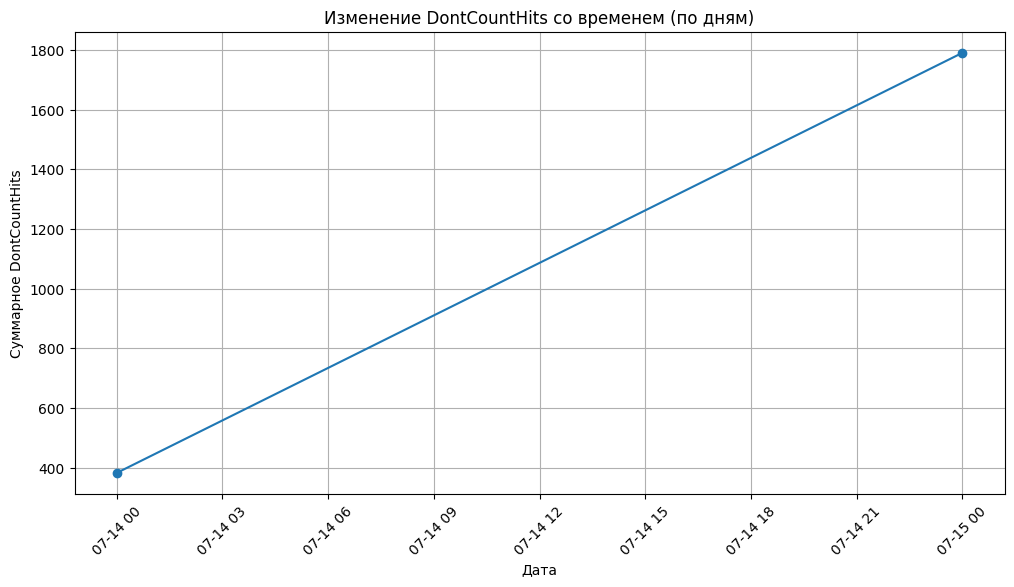

In [40]:
df['EventTime'] = pd.to_datetime(df['EventTime'])
daily_data = df.resample('D', on='EventTime').sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['DontCountHits'], marker='o', linestyle='-')
plt.title('Изменение DontCountHits со временем (по дням)')
plt.xlabel('Дата')
plt.ylabel('Суммарное DontCountHits')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Как видно, суммарное число незасчитанных хитов растет со временем постоянно.

Посмотрим тепловую карту корреляции

<ipython-input-42-9518b8b07585>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


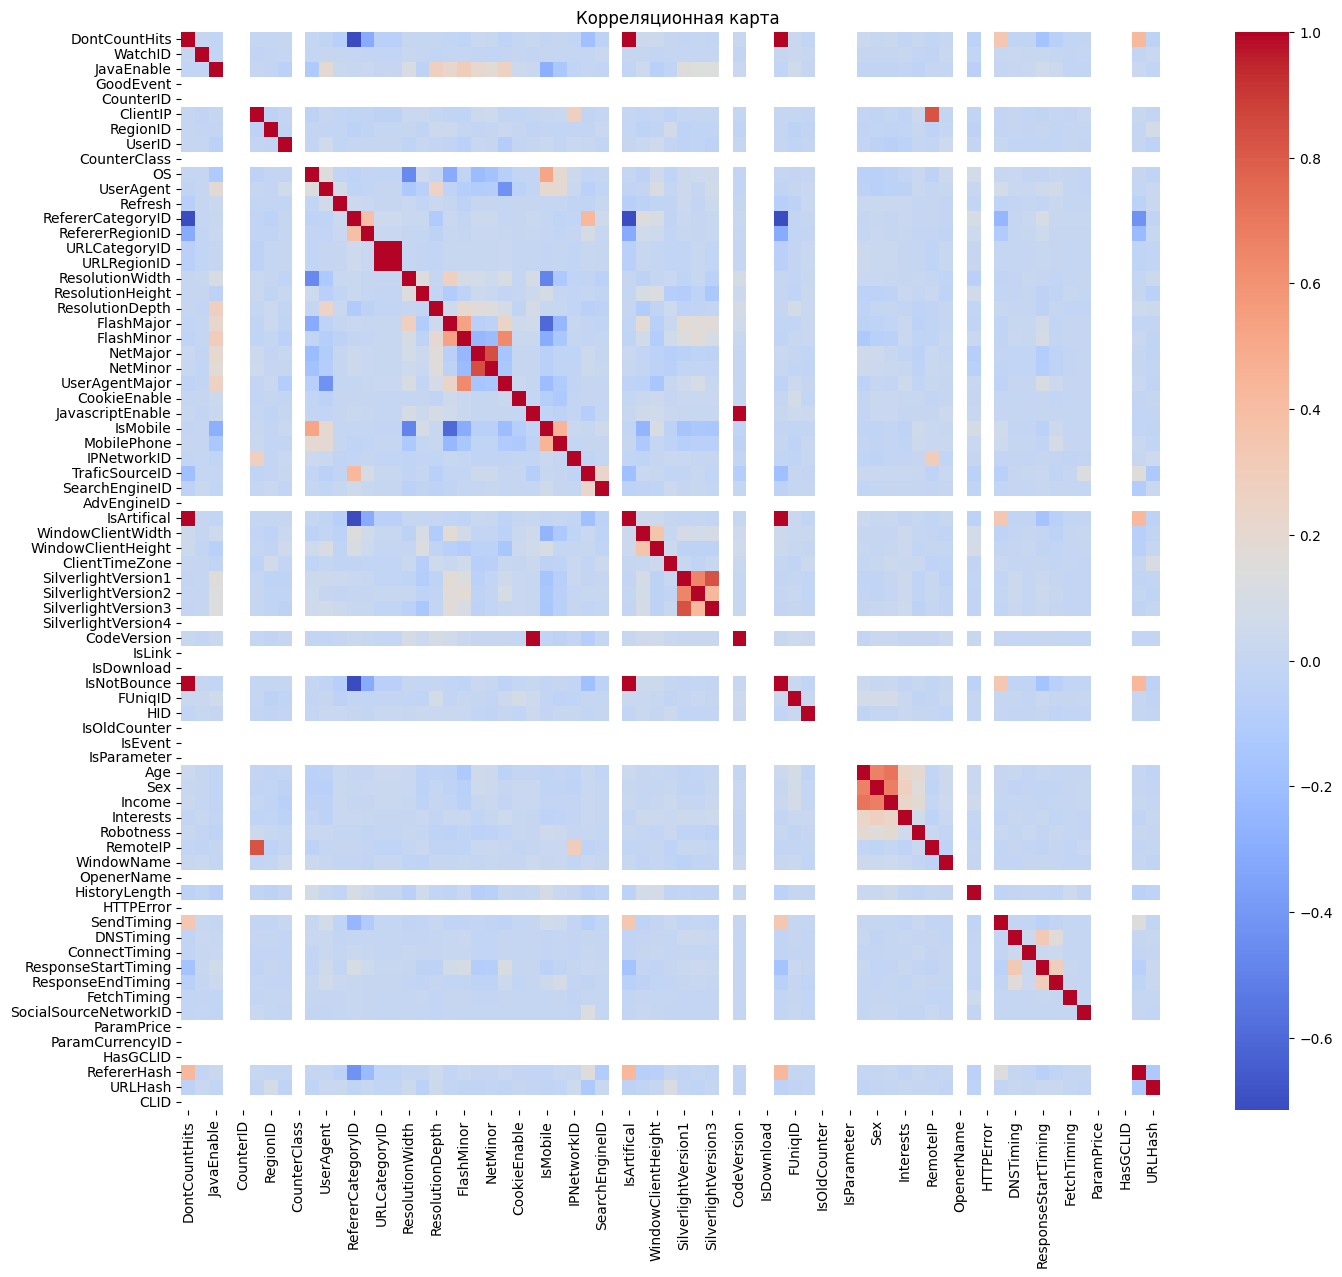

In [42]:
columns_of_interest = [
    'DontCountHits', 'WatchID', 'JavaEnable', 'Title', 'GoodEvent', 'EventTime', 'EventDate',
    'CounterID', 'ClientIP', 'RegionID', 'UserID', 'CounterClass', 'OS', 'UserAgent', 'URL', 'Referer',
    'Refresh', 'RefererCategoryID', 'RefererRegionID', 'URLCategoryID', 'URLRegionID',
    'ResolutionWidth', 'ResolutionHeight', 'ResolutionDepth', 'FlashMajor', 'FlashMinor', 'FlashMinor2',
    'NetMajor', 'NetMinor', 'UserAgentMajor', 'UserAgentMinor', 'CookieEnable', 'JavascriptEnable',
    'IsMobile', 'MobilePhone', 'MobilePhoneModel', 'Params', 'IPNetworkID', 'TraficSourceID', 'SearchEngineID',
    'SearchPhrase', 'AdvEngineID', 'IsArtifical', 'WindowClientWidth', 'WindowClientHeight',
    'ClientTimeZone', 'ClientEventTime', 'SilverlightVersion1', 'SilverlightVersion2', 'SilverlightVersion3',
    'SilverlightVersion4', 'PageCharset', 'CodeVersion', 'IsLink', 'IsDownload', 'IsNotBounce',
    'FUniqID', 'OriginalURL', 'HID', 'IsOldCounter', 'IsEvent', 'IsParameter',
    'Age', 'Sex', 'Income', 'Interests', 'Robotness', 'RemoteIP', 'WindowName', 'OpenerName',
    'HistoryLength', 'BrowserLanguage', 'BrowserCountry', 'SocialNetwork', 'SocialAction', 'HTTPError',
    'SendTiming', 'DNSTiming', 'ConnectTiming', 'ResponseStartTiming', 'ResponseEndTiming', 'FetchTiming',
    'SocialSourceNetworkID', 'SocialSourcePage', 'ParamPrice', 'ParamOrderID', 'ParamCurrency',
    'ParamCurrencyID', 'OpenstatServiceName', 'OpenstatCampaignID', 'OpenstatAdID', 'OpenstatSourceID',
    'UTMSource', 'UTMMedium', 'UTMCampaign', 'UTMContent', 'UTMTerm', 'FromTag', 'HasGCLID', 'RefererHash', 'URLHash', 'CLID'
]

subset_df = df[columns_of_interest]

# Постройте корреляционную матрицу
correlation_matrix = subset_df.corr()

# Создайте тепловую карту корреляции
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title('Корреляционная карта')
plt.show()

Как видно из тепловой карты, сильная корреляция наблюдается у DontCountHits совместно с: IsNotBounce(выполнял действия на сайте или покинул), IsArtificial(Является ли ИИ(ненастоящим пользователем)), а также Senttiming(время отправки) и ReferHash(прикрепленный к пользователю хэш)

Посмотрим несколько моделей машинного обучения, как они прогнозируют состояние переменной DontCountHits(на основе прогноза можно выявить переменные, вносящие наибольший вклад в нахождение статистических зависимостей в данных)

In [364]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC

In [365]:
data = df.copy()

In [366]:
df['MobilePhoneModel'] = df['MobilePhoneModel'].apply(lambda x: 'New' if x == '' else x)

In [367]:
columns_to_drop = ['WatchID', 'ClientIP','Title','OriginalURL','RefererHash','UTMSource', 'UTMMedium', 'UTMCampaign', 'UTMContent',
                   'UTMTerm','OpenstatSourceID','OpenstatAdID','OpenstatCampaignID','SocialSourcePage','OpenstatServiceName','ParamCurrency',
                   'ParamOrderID','SocialAction','SocialNetwork','SilverlightVersion3','UserAgentMinor','SearchPhrase','RegionID','Params',
                   'UserID','EventTime','EventDate','Robotness', 'FUniqID', 'HID', 'CLID', 'EventDate', 'LocalEventTime',  'URL', 'Referer',
                   'MobilePhone', 'CounterID', 'OpenerName','ClientEventTime','PageCharset', 'WindowName','Interests', 'IPNetworkID',
                   'UserAgentMajor','RemoteIP','URLHash']
data = data.drop(columns=columns_to_drop, axis = 0)
data = data.applymap(lambda x: np.nan if x == '' else x)
data = data.dropna(how='all')

In [368]:
data = pd.get_dummies(data, columns=['UserAgent'])
data = pd.get_dummies(data, columns=['SocialSourceNetworkID'])
data = pd.get_dummies(data, columns=['TraficSourceID'])
data = pd.get_dummies(data, columns=['HitColor'])
data = pd.get_dummies(data, columns=['NetMajor'])
data = pd.get_dummies(data, columns=['NetMinor'])
data = pd.get_dummies(data, columns=['SearchEngineID'])
data = pd.get_dummies(data, columns=['RefererRegionID'])
data = pd.get_dummies(data, columns=['CodeVersion'])
data = pd.get_dummies(data, columns=['ClientTimeZone'])
data = pd.get_dummies(data, columns=['OS'])
data = pd.get_dummies(data, columns=['URLCategoryID'])
data = pd.get_dummies(data, columns=['URLRegionID'])
data = pd.get_dummies(data, columns=['RefererCategoryID'])
data = pd.get_dummies(data, columns=['MobilePhoneModel'])
data = pd.get_dummies(data, columns=['Sex'])
data = pd.get_dummies(data, columns=['BrowserLanguage'])
data = pd.get_dummies(data, columns=['BrowserCountry'])
cols = ['BrowserCountry','BrowserLanguage','Sex','MobilePhoneModel','RefererCategoryID','URLRegionID','URLCategoryID','OS',
        'ClientTimeZone','CodeVersion','RefererRegionID','SearchEngineID','NetMinor','NetMajor','HitColor','TraficSourceID',
        'SocialSourceNetworkID','UserAgent']
#data = data.drop(columns=cols, axis = 0)
data = data.dropna(how='all')

In [369]:
y = data['DontCountHits']
x = data.drop('DontCountHits',axis=1)

xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42, stratify= y)

print(y.value_counts())
print(ytrain.value_counts())

0    6019
1    2173
Name: DontCountHits, dtype: int64
0    4213
1    1521
Name: DontCountHits, dtype: int64


In [370]:
data = data.applymap(lambda x: np.nan if x == '' else x)
data = data.dropna(axis=1)

In [376]:
ytest.shape

(2458,)

In [372]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [388]:
models = {
    'DECISION_TREE':DecisionTreeClassifier(),
    'RANDOM_FOREST':RandomForestClassifier(),
    'GRADIENT':GradientBoostingClassifier(),
    'EXTRA_TREES':ExtraTreesClassifier(),
    'KNeighbours':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(),
    'QuadraticDiscriminantAnalysis':QuadraticDiscriminantAnalysis(),
    'Support Vector Machines': LinearSVC()
}

Name: DECISION_TREE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00       652

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458





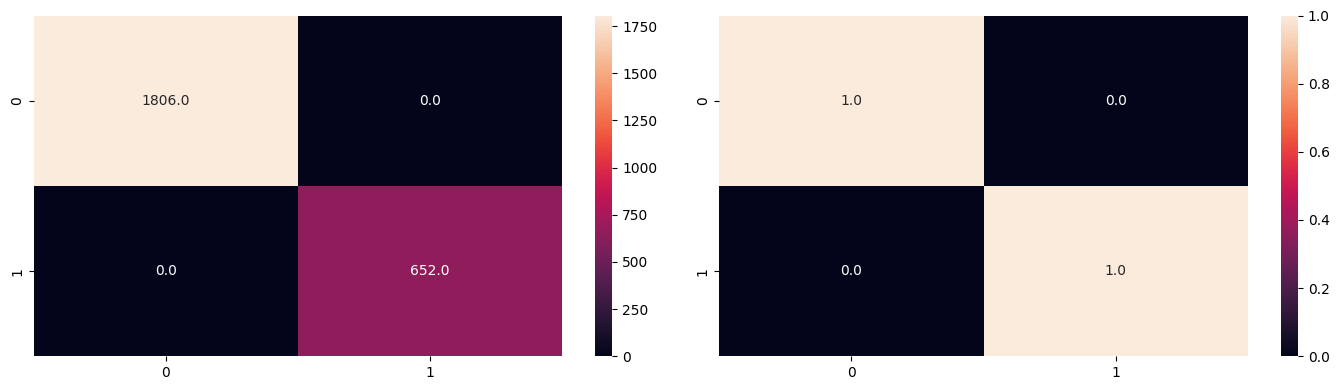

Method result =  1.0

Name: RANDOM_FOREST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00       652

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458





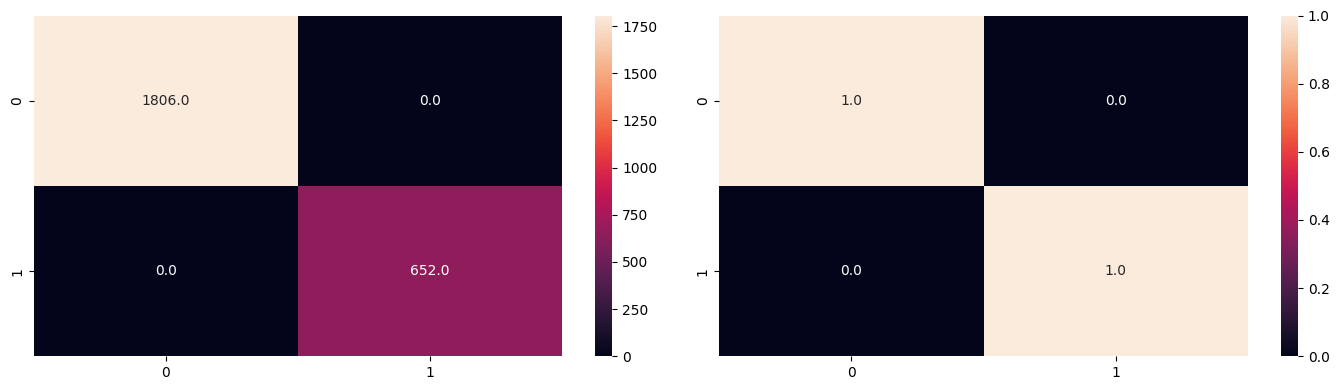

Method result =  1.0

Name: GRADIENT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00       652

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458





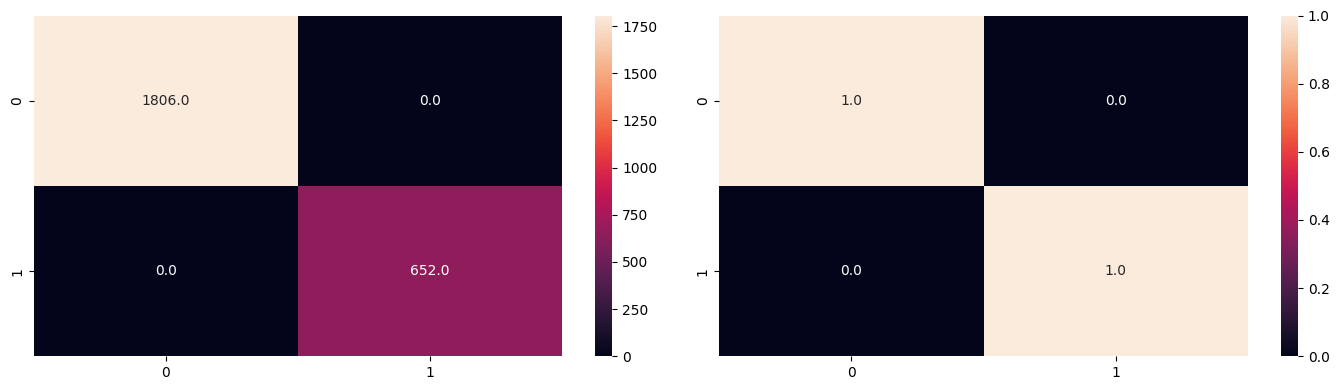

Method result =  1.0

Name: EXTRA_TREES
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00       652

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458





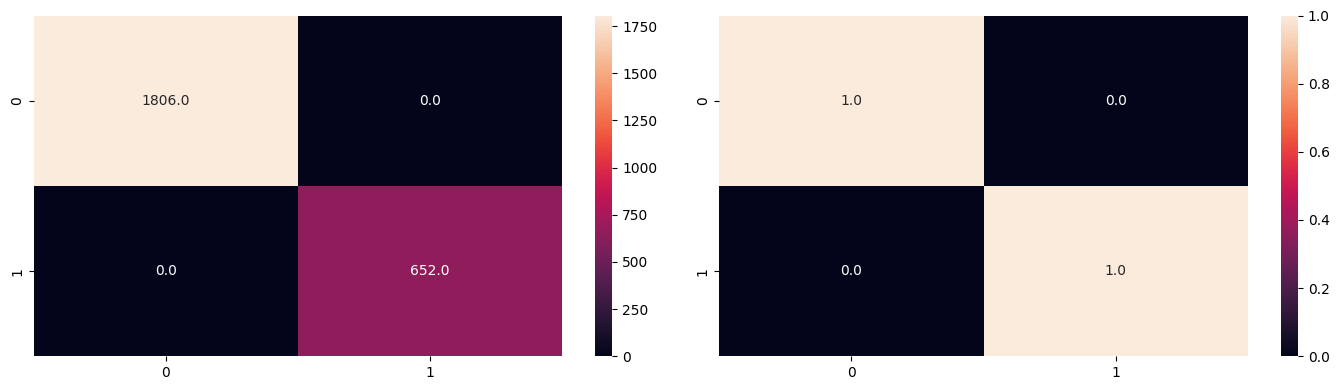

Method result =  1.0

Name: KNeighbours
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1806
           1       0.99      0.85      0.91       652

    accuracy                           0.96      2458
   macro avg       0.97      0.92      0.94      2458
weighted avg       0.96      0.96      0.96      2458





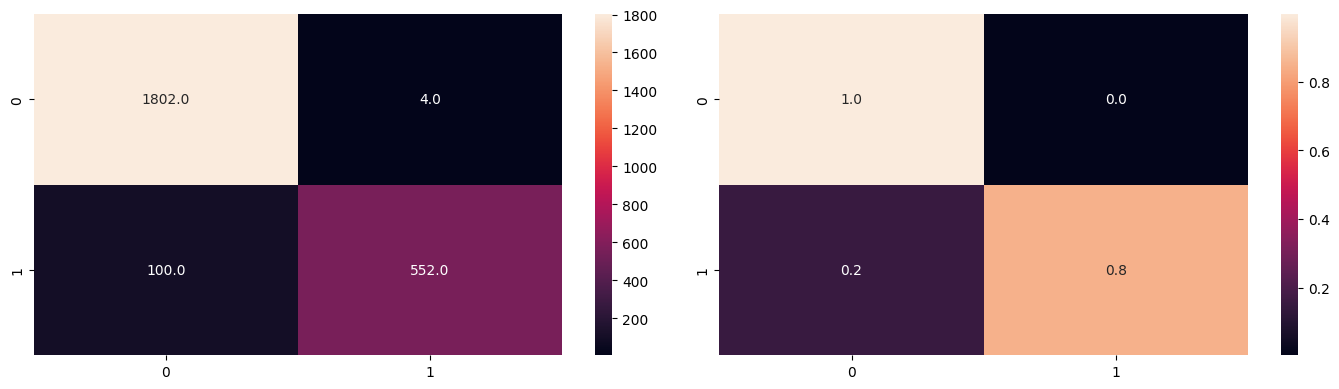

Method result =  0.9565556663897583

Name: LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      0.99      0.99       652

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458





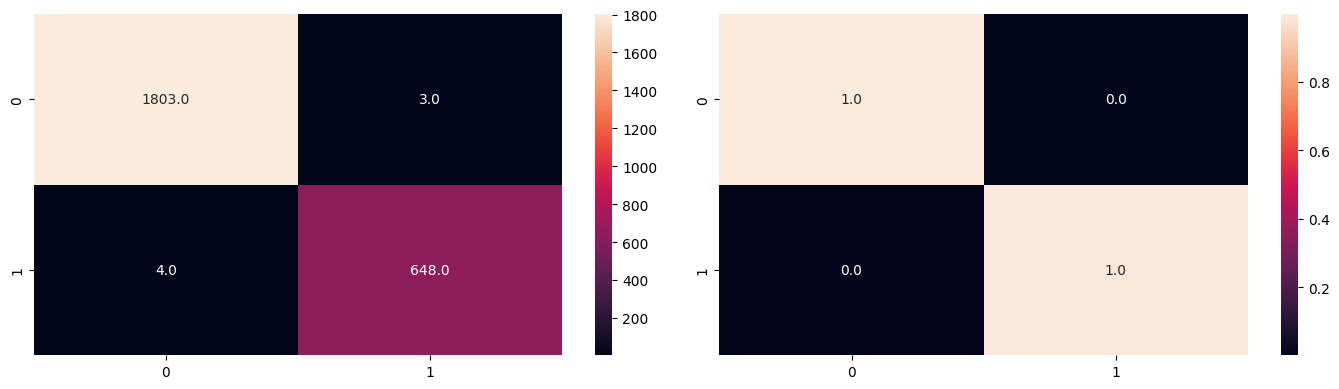

Method result =  0.9971514575325765

Name: QuadraticDiscriminantAnalysis


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00       652

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458





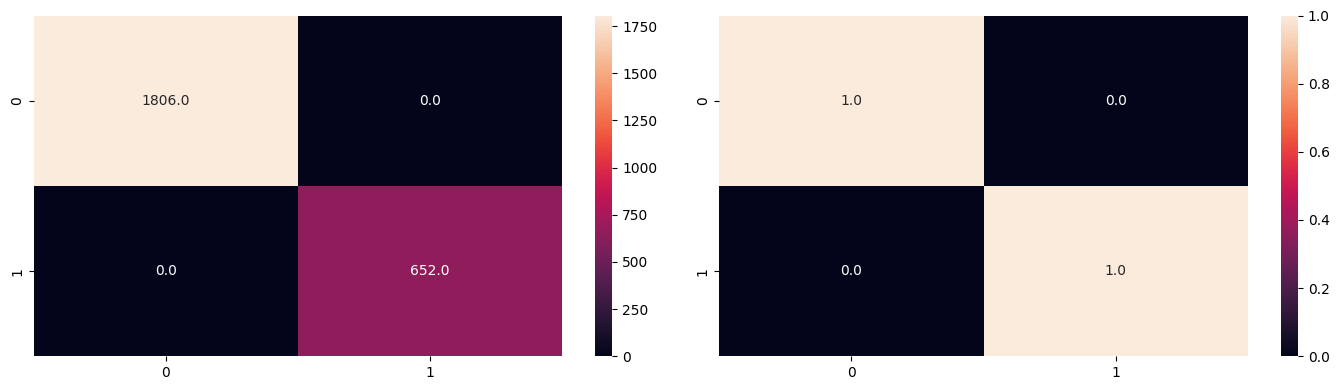

Method result =  1.0

Name: Support Vector Machines


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1806
           1       1.00      0.98      0.99       652

    accuracy                           1.00      2458
   macro avg       1.00      0.99      0.99      2458
weighted avg       1.00      1.00      1.00      2458





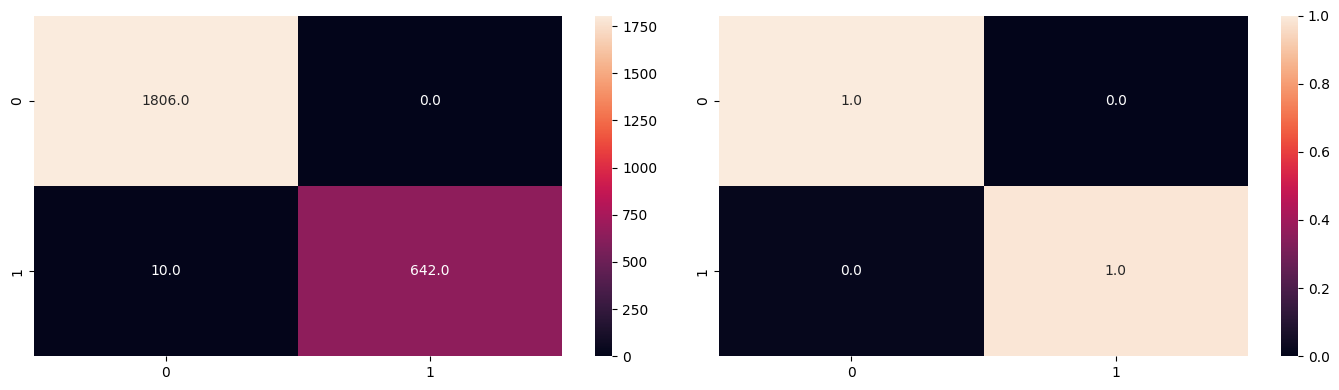

Method result =  0.9959215478647407



In [389]:
for name,model in models.items():
    print('Name:', name)
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    score = model.score(xtest, ytest)
    print(classification_report(ytest,y_pred))
    report = classification_report(ytest, y_pred, output_dict=True)
    f1_score_value = report['weighted avg']['f1-score']
    if f1_score_value>maxv:
        maxv = f1_score_value
        best = name
    print()
    print()

    cm = confusion_matrix(ytest,y_pred)
    cm_ = cm/cm.sum(axis=1).reshape(-1,1)

    fig, ax = plt.subplots(1,2,figsize=(14,4))
    sns.heatmap(cm, annot=True,fmt='.1f',ax=ax[0])
    sns.heatmap(cm_, annot=True,fmt='.1f',ax=ax[1])
    plt.tight_layout()
    plt.show(f1_score_value)
    print('Method result = ', f1_score_value)
    print('='*80)
    print()

RandomForestClassifier()


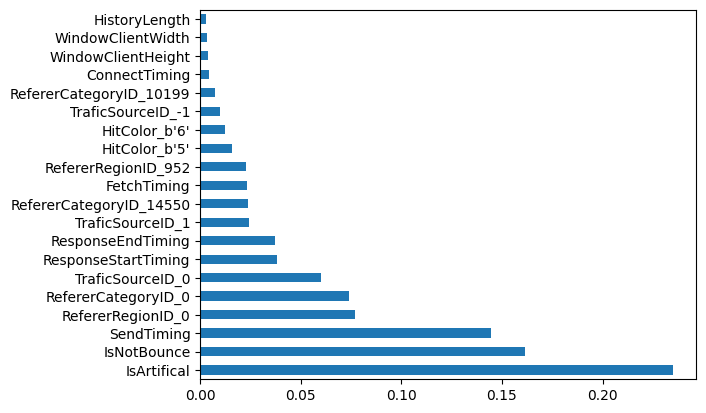

In [390]:
model = RandomForestClassifier()
model.fit(x,y)
print(model)
importance = pd.Series(model.feature_importances_, index=x.columns)
importance.nlargest(20).plot(kind='barh')
plt.show()

Как видно из графика, все те же предикторы, что мы выделяли, когда использовали тепловую карту, оказывают влияние на прогнозирование. В частоности, если система распознает бота, то не засчитывает посещение; если клиент просто перешел на страницу, но ничего не делал, действие также не засчитывается. Далее по списку можно рассмотреть черты, которые свойственны таким "посетителям"